# Hands-on 5

### CS2545 - Data Science ###
### Fall, 2021 ###
### UNB, Fredericton ###

Please complete the following and submit this notebook (filename: handson5-**lastname**-**firstname**.ipynb) to D2L by 5:00 pm, Monday, November 22. 
</br>
</br>
</br>

**Q1.** Download *user.csv*  from hands-on4. The entries in *user*  represent movie reviewers.

Then download the *rating.csv* from hands-on4.  The entries in *rating* represents the movie ratings given by these reviewers. 


Finally, join these two data frames to create a new data frame *rated_by*.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
user = pd.read_csv('user.csv', sep='|', names=u_cols)

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
rating = pd.read_csv('rating.csv', sep='\t', names=r_cols)

# write your code below
rated_by = pd.merge(user,rating)
rated_by.head()

,user_id,age,sex,occupation,zip_code,movie_id,rating,unix_timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883


**Q1.1.**  Plot a chart with two subplots in a  2 x 1 (i.e. 2 rows and 1 column) layout. Hence, there will be two subplots one on top of the other. The x-axis label should be 'occupation' and shared by both the subplots. The title should appear above the top subplot and it will be 'Movie rating by occupation'.

In the top subplot, plot a bar graph of the number of movie rating attributed to each occupation. The y-axis label should be  'count rating'.

In the bottom subplot, plot a bar graph of the average movie rating attributed to each occupation. The y-axis label should be  'mean rating'.

Text(0, 0.5, 'mean rating')

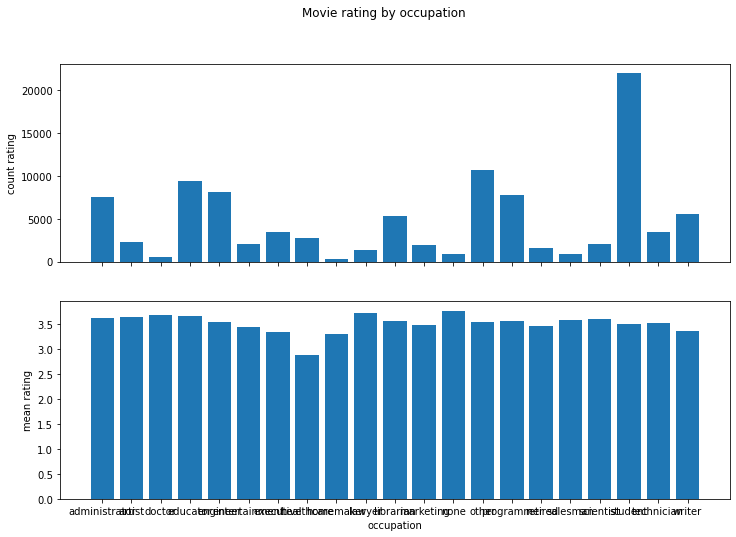

In [52]:
# write your code below
f, axes = plt.subplots(2, sharex=True, sharey=False, figsize=(12, 8))
plt.suptitle('Movie rating by occupation')
df_sub_one = rated_by.groupby('occupation')
plt.xlabel("occupation")
axes[0].bar(df_sub_one.groups.keys(),df_sub_one.count()['user_id'])
axes[0].set_ylabel('count rating')
axes[1].bar(df_sub_one.groups.keys(),df_sub_one['rating'].mean())
axes[1].set_ylabel('mean rating')

**Q2.** The purpose of this question is to familiarize you with the  National Survey of Family Growth (NSFG) dataset used in the textbook. 

Download the codendata.zip by running the commands below in a Terminal shell (on Linux) or clicking the link (on Windows): <br>
wget www.cs.unb.ca/~sray/teaching/datascience/codendata.zip <br>

After you unzip it, you will find several files related to code and NSFG dataset. Copy those files in the current folder.


In [53]:
import nsfg

nsfg_df = nsfg.ReadFemPreg()

nsfg_df.head(5)

# execute this code cell

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


**Q2.1** After loading the NSFG dataset, plot a boxplot  of the birth weights for live births. The corresponding column in the data frame is called *birthwgt_lb*.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0c9bd1f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0c9bdf640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0c9bd1be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0c9bdfd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0c9bef0a0>],
 'means': []}

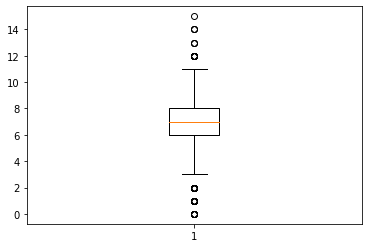

In [57]:
# write your code below
plt.boxplot(nsfg_df['birthwgt_lb'].dropna())

**Q2.2** Visually inspect the boxplot to answer the question: what are Q1 and Q3  of the birth weights for live births?

*Hint:* refer to lecture slides on Statistics

Answer: Q1 = 6, Q3 = 8

**Q2.3** 
Using *thinkstats2* APIs calculate Q1 and Q3 of the birth weights for live births (using the dataframe in Q2.1)?

Then calculate the IQR of the  birth weights for live births.

*Hint:* Refer to class notes on percentile and percentile rank APIs from Cdf object.

In [61]:
import thinkstats2
import thinkplot

# write your code below

cdf = thinkstats2.Cdf(nsfg_df['birthwgt_lb'].dropna())
print("way2: k-th percentile: ", cdf.Percentile(25))
print("way2: k-th percentile: ", cdf.Percentile(75))
IQR = cdf.Percentile(75) - cdf.Percentile(25)
print("IQR: " ,IQR)

way2: k-th percentile:  6.0
way2: k-th percentile:  8.0
IQR:  2.0
